### FOOD BRAND DATA

In [2]:
# importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings

In [3]:
# loading the data
df=pd.read_csv('../data/Food_Beverage_Sales_Expanded.csv')

In [4]:
df.head()

,Invoice ID,Year,Month,Brand,Product,Category,Quantity,Unit Price,Total Sales,Store Name,Region
0,FB1001,2023,June,Lay’s,Yogurt 200g,Frozen Desserts,799,7.35,5872.65,Family Store B,South America
1,FB1002,2022,September,Kellogg’s,Milk Powder 1kg,Beverages,135,4.09,552.15,Grocers Z,North America
2,FB1003,2023,August,Kellogg’s,Corn Flakes 500g,Beverages,465,9.34,4343.10,FreshMart A,Africa
3,FB1004,2024,October,Kellogg’s,Chips 200g,Dairy Products,634,7.07,4482.38,Grocers Z,North America
4,FB1005,2024,September,General Mills,Muesli 750g,Beverages,186,6.50,1209.00,MarketPlace D,South America


In [5]:
df.tail()

,Invoice ID,Year,Month,Brand,Product,Category,Quantity,Unit Price,Total Sales,Store Name,Region
95,FB1096,2024,January,Lay’s,Soft Drink 500ml,Beverages,600,5.02,3012.00,Family Store B,Australia
96,FB1097,2024,April,Danone,Yogurt 200g,Frozen Desserts,632,1.16,733.12,Family Store B,Africa
97,FB1098,2023,February,Kellogg’s,Chips 200g,Dairy Products,737,6.66,4908.42,Family Store B,Africa
98,FB1099,2022,November,General Mills,Muesli 750g,Snacks,231,5.11,1180.41,FreshMart A,Australia
99,FB1100,2022,June,Pepsi,Soft Drink 1L,Snacks,835,4.71,3932.85,ShopEase E,Europe


In [6]:
df.columns

Index(['Invoice ID', 'Year', 'Month', 'Brand', 'Product', 'Category',
       'Quantity', 'Unit Price', 'Total Sales', 'Store Name', 'Region'],
      dtype='object')

In [7]:
df.dtypes

Invoice ID      object
Year             int64
Month           object
Brand           object
Product         object
Category        object
Quantity         int64
Unit Price     float64
Total Sales    float64
Store Name      object
Region          object
dtype: object

In [8]:
df.describe()

,Year,Quantity,Unit Price,Total Sales
count,100.000000,100.000000,100.000000,100.000000
mean,2023.060000,545.020000,5.212800,2874.052900
std,0.826579,267.702042,2.883771,2297.378334
min,2022.000000,59.000000,0.620000,51.840000
25%,2022.000000,295.750000,2.807500,1053.697500
50%,2023.000000,568.500000,5.090000,2314.845000
75%,2024.000000,779.750000,7.760000,4461.470000
max,2024.000000,989.000000,9.950000,9388.610000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Invoice ID   100 non-null    object 
 1   Year         100 non-null    int64  
 2   Month        100 non-null    object 
 3   Brand        100 non-null    object 
 4   Product      100 non-null    object 
 5   Category     100 non-null    object 
 6   Quantity     100 non-null    int64  
 7   Unit Price   100 non-null    float64
 8   Total Sales  100 non-null    float64
 9   Store Name   100 non-null    object 
 10  Region       100 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 8.7+ KB


In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

Invoice ID     0
Year           0
Month          0
Brand          0
Product        0
Category       0
Quantity       0
Unit Price     0
Total Sales    0
Store Name     0
Region         0
dtype: int64

Correlation Matrix:
                 Year  Quantity  Unit Price  Total Sales
Year         1.000000  0.072530    0.109937     0.121980
Quantity     0.072530  1.000000    0.043143     0.640475
Unit Price   0.109937  0.043143    1.000000     0.714148
Total Sales  0.121980  0.640475    0.714148     1.000000


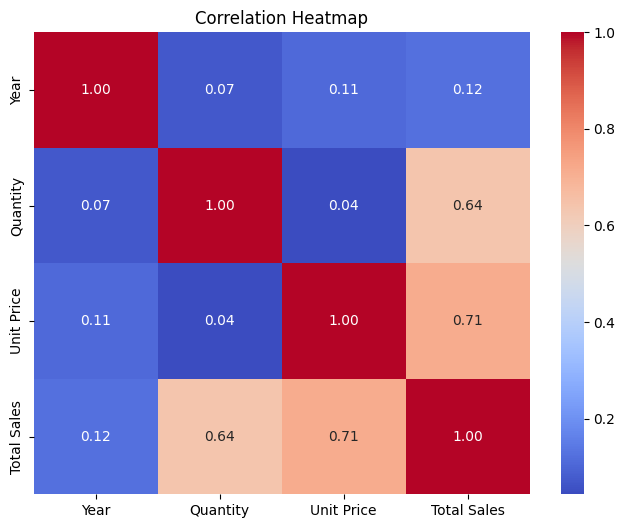

In [13]:
# Select numerical columns for correlation
numerical_columns = ["Year", "Quantity", "Unit Price", "Total Sales"]
correlation_matrix = df[numerical_columns].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


Quantity Outliers:
Empty DataFrame
Columns: [Quantity]
Index: []
Unit Price Outliers:
Empty DataFrame
Columns: [Unit Price]
Index: []
Total Sales Outliers:
Empty DataFrame
Columns: [Total Sales]
Index: []


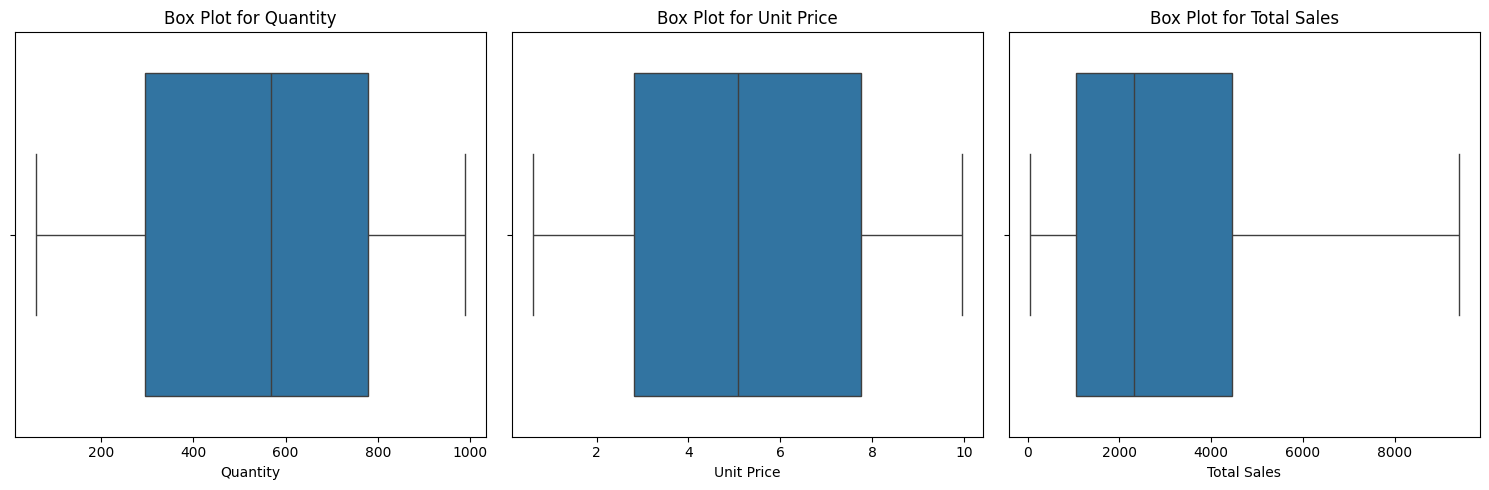

In [17]:
# Selecting numerical columns for outlier detection
numerical_columns = ["Quantity", "Unit Price", "Total Sales"]

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df, columns):
    outliers = {}
    for column in columns:
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        print(f"{column} Outliers:")
        print(outliers[column][[column]])  # Display only the outlier values for the column
        
    return outliers

# Detect and print outliers
outliers = detect_outliers_iqr(df, numerical_columns)

# Visualizing with boxplots
plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()


In [20]:
df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'])


C:\Users\SREE GANESHA\AppData\Local\Temp\ipykernel_21340\3715989791.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Month'])


In [21]:
df['Average Price'] = df['Total Sales'] / df['Quantity']


In [23]:
df

,Invoice ID,Year,Month,Brand,Product,Category,Quantity,Unit Price,Total Sales,Store Name,Region,Date,Average Price
0,FB1001,2023,June,Lay’s,Yogurt 200g,Frozen Desserts,799,7.35,5872.65,Family Store B,South America,2023-06-01,7.35
1,FB1002,2022,September,Kellogg’s,Milk Powder 1kg,Beverages,135,4.09,552.15,Grocers Z,North America,2022-09-01,4.09
2,FB1003,2023,August,Kellogg’s,Corn Flakes 500g,Beverages,465,9.34,4343.10,FreshMart A,Africa,2023-08-01,9.34
3,FB1004,2024,October,Kellogg’s,Chips 200g,Dairy Products,634,7.07,4482.38,Grocers Z,North America,2024-10-01,7.07
4,FB1005,2024,September,General Mills,Muesli 750g,Beverages,186,6.50,1209.00,MarketPlace D,South America,2024-09-01,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FB1096,2024,January,Lay’s,Soft Drink 500ml,Beverages,600,5.02,3012.00,Family Store B,Australia,2024-01-01,5.02
96,FB1097,2024,April,Danone,Yogurt 200g,Frozen Desserts,632,1.16,733.12,Family Store B,Africa,2024-04-01,1.16
97,FB1098,2023,February,Kellogg’s,Chips 200g,Dairy Products,737,6.66,4908.42,Family Store B,Africa,2023-02-01,6.66
98,FB1099,2022,November,General Mills,Muesli 750g,Snacks,231,5.11,1180.41,FreshMart A,Australia,2022-11-01,5.11


In [25]:
# Save the modified data to a new DataFrame
dfs = df.copy()

# Optional: Save the new DataFrame to a CSV file if needed
dfs.to_csv("foodretail1.csv", index=False)

print("Modified data has been saved to 'dfs' and optionally to 'retail1.csv'.")


Modified data has been saved to 'dfs' and optionally to 'retail1.csv'.


In [28]:
dfs

,Invoice ID,Year,Month,Brand,Product,Category,Quantity,Unit Price,Total Sales,Store Name,Region,Date,Average Price
0,FB1001,2023,June,Lay’s,Yogurt 200g,Frozen Desserts,799,7.35,5872.65,Family Store B,South America,2023-06-01,7.35
1,FB1002,2022,September,Kellogg’s,Milk Powder 1kg,Beverages,135,4.09,552.15,Grocers Z,North America,2022-09-01,4.09
2,FB1003,2023,August,Kellogg’s,Corn Flakes 500g,Beverages,465,9.34,4343.10,FreshMart A,Africa,2023-08-01,9.34
3,FB1004,2024,October,Kellogg’s,Chips 200g,Dairy Products,634,7.07,4482.38,Grocers Z,North America,2024-10-01,7.07
4,FB1005,2024,September,General Mills,Muesli 750g,Beverages,186,6.50,1209.00,MarketPlace D,South America,2024-09-01,6.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FB1096,2024,January,Lay’s,Soft Drink 500ml,Beverages,600,5.02,3012.00,Family Store B,Australia,2024-01-01,5.02
96,FB1097,2024,April,Danone,Yogurt 200g,Frozen Desserts,632,1.16,733.12,Family Store B,Africa,2024-04-01,1.16
97,FB1098,2023,February,Kellogg’s,Chips 200g,Dairy Products,737,6.66,4908.42,Family Store B,Africa,2023-02-01,6.66
98,FB1099,2022,November,General Mills,Muesli 750g,Snacks,231,5.11,1180.41,FreshMart A,Australia,2022-11-01,5.11


In [29]:
dfs.columns

Index(['Invoice ID', 'Year', 'Month', 'Brand', 'Product', 'Category',
       'Quantity', 'Unit Price', 'Total Sales', 'Store Name', 'Region', 'Date',
       'Average Price'],
      dtype='object')

In [31]:
import mysql.connector

# Database connection details
db_config = {
    'host': 'localhost',
    'user': 'root',        # Replace with your MySQL username
    'password': 'root',    # Replace with your MySQL password
    'database': 'timeseries'  # Replace with your database name
}

# Connect to the database
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

# Create the table if it doesn't exist
table_name = 'foodretail_table'
create_table_query = f"""
CREATE TABLE IF NOT EXISTS {table_name} (
    Invoice_ID VARCHAR(255),
    Year INT,
    Month VARCHAR(50),
    Brand VARCHAR(255),
    Product VARCHAR(255),
    Category VARCHAR(255),
    Quantity INT,
    Unit_Price FLOAT,
    Total_Sales FLOAT,
    Store_Name VARCHAR(255),
    Region VARCHAR(255),
    Date DATE,
    Average_Price FLOAT
);
"""
cursor.execute(create_table_query)

# Select columns to insert from the DataFrame
df_to_insert = dfs[['Invoice ID', 'Year', 'Month', 'Brand', 'Product', 'Category', 
                   'Quantity', 'Unit Price', 'Total Sales', 'Store Name', 'Region', 
                   'Date', 'Average Price']]

# Insert data from the DataFrame into the table
insert_query = f"""
INSERT INTO {table_name} (Invoice_ID, Year, Month, Brand, Product, Category, 
                          Quantity, Unit_Price, Total_Sales, Store_Name, Region, 
                          Date, Average_Price)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""
data_to_insert = df_to_insert.values.tolist()  # Convert DataFrame to list of tuples
cursor.executemany(insert_query, data_to_insert)

# Commit the transaction and close the connection
connection.commit()
print(f"Data inserted into table '{table_name}' successfully.")
cursor.close()
connection.close()


Data inserted into table 'foodretail_table' successfully.
